# Marketing Analysis

Marketing mix stands as a widely utilized concept in the execution of marketing strategies. It encompasses various facets within a comprehensive marketing plan, with a central focus on the four Ps of marketing: product, price, place, and promotion.

## Imports 

In [622]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler

## Data Evaluation

In [623]:
df = pd.read_csv('marketing_data.csv')
market_df = df.copy(deep=True)

In [624]:
market_df.sample(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2185,5046,1958,Graduation,Divorced,"$78,331.00",0,1,1/23/14,97,756,...,7,4,0,0,0,0,0,0,0,SA
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
37,10141,1960,Master,Divorced,"$39,228.00",0,0,5/10/13,1,7,...,3,4,0,0,0,0,0,0,0,SA
1428,3712,1959,Graduation,Divorced,"$52,332.00",0,0,8/28/13,63,212,...,6,4,0,1,0,0,0,0,0,IND
769,7725,1965,2n Cycle,Married,"$76,800.00",0,0,3/8/14,33,173,...,7,1,0,0,0,0,0,0,0,IND
461,4322,1958,PhD,Together,"$77,863.00",0,0,11/27/13,20,881,...,10,2,0,0,0,0,0,0,0,SP
1810,702,1975,2n Cycle,Widow,"$47,682.00",0,1,2/15/13,80,162,...,8,5,0,0,0,0,0,0,0,SP
1255,10691,1960,Master,Married,"$28,520.00",1,1,6/14/13,55,11,...,2,6,0,0,0,0,0,0,0,SP
1491,2525,1974,PhD,Married,"$38,410.00",0,0,9/14/12,65,153,...,9,6,0,0,0,0,0,1,0,CA
1001,7397,1951,Graduation,Single,"$49,090.00",0,1,7/19/13,45,494,...,9,7,0,0,0,0,0,0,0,SP


In [625]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [626]:
market_df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [627]:
print('Missing values per column:')
market_df.isnull().sum()

Missing values per column:


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Initial observations
- Income column has a space in the name -> Recommend removing space so we can find it easily
- Income has a few nulls or na values -> Recommend imputing based on neighbored features
- ID has a min of 0, may not be valid -> If ID has multiple 0 consider invalid
- Income is typed as an object -> Recommend changing to float32 by parsing or removing the chars ($,) 
- Kidhome, TeenHome, and the AcceptedCmp columns look to be bitwise -> Recommend converting to boolean
- DT_Customer is a date -> recommend converting for DateTime functions

## Preparing Imputation Data

### Perform the following Changes
- Encode Education and Martial_Status
- Update Income column name to remove spaces 
- Update Income to be int and remove $, characters

In [628]:
numerical_features = market_df.select_dtypes(include=['int64']).columns.to_list()

In [629]:
#Fixing Income name for easier writing later
market_df.rename(columns={' Income ': 'Income'}, inplace=True)

#### Education cleaning

In [630]:
market_df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

We could possibly say 2n Cycle is equal or the same as Master's. Would could reduce this and just add the 2 categories.

In [631]:
#We need to encode them for imputing, could say 
ordinal_education = [['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']]
encoder = OrdinalEncoder(categories=ordinal_education)

market_df['Education_encoded'] = encoder.fit_transform(market_df[['Education']])

print('Education ordinal mapping')
market_df[['Education', 'Education_encoded']].drop_duplicates().sort_values('Education_encoded')

Education ordinal mapping


,Education,Education_encoded
54,Basic,0.0
0,Graduation,1.0
6,2n Cycle,2.0
11,Master,3.0
5,PhD,4.0


#### Marital Status cleaning 

In [632]:
market_df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

We found invalid and synonymous data inputs for Marital Status 
- alone = single
- yolo invalid -> recommend making it single
- absurd invalid -> recommend making it single

We could also say widow and single could be the same as well, depends on our needs. For now we leave it as a valid category. Together also hints at there may be need for a 'separated' category for married couples. 

In [633]:
pd.set_option('display.max_columns', None)
market_df[market_df['Marital_Status'] == 'YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Education_encoded
103,492,1973,PhD,YOLO,"$48,432.00",0,1,10/18/12,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,0,CA,4.0
104,11133,1973,PhD,YOLO,"$48,432.00",0,1,10/18/12,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,1,0,IND,4.0


Something is off with the YOLO status people, they have the same values in their features except Country. This could be a sign of ID theft or a data copy mistake. I suspect it was a data copy mistake considering the index of these are 103 and 104. It can be safe to assume the row 103 was an accident. Index 104 also has a response flag of 1. 

In [634]:
market_df[market_df['Marital_Status'] == 'Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Education_encoded
1068,4369,1957,Master,Absurd,"$65,487.00",0,0,1/10/14,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,0,CA,3.0
1339,7734,1993,Graduation,Absurd,"$79,244.00",0,0,12/19/12,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,1,0,AUS,1.0


In [635]:
market_df['Marital_Status'] = market_df['Marital_Status'].replace({
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single'
})

market_df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64

In [636]:
#Rest option back to normal
pd.reset_option('display.max_columns')

In [637]:
#Encoding valid data points
encoder = OneHotEncoder(sparse_output=False, drop='first')
onehot_array = encoder.fit_transform(market_df[['Marital_Status']])

onehot_df_marital = pd.DataFrame(
    onehot_array,
    columns=encoder.get_feature_names_out(['Marital_Status']),
    index=market_df.index
)

#Concat the results back into our market object
market_df = pd.concat([market_df, onehot_df_marital], axis=1)

print('Marital Status encoded')
onehot_df_marital.head(20)

Marital Status encoded


,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0
8,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0


#### Income cleaning

In [638]:
#convert and clean the income column for imputation
market_df['Income'] = (
    market_df['Income']
    .str.strip()        #We found spaces as well in our data
    .replace(r'[\$,]', '', regex=True)
    .astype('float')
    # .astype('uint32')
)

#Add to numerical features
numerical_features.append('Income')

market_df['Income'].head(20)

0     84835.0
1     57091.0
2     67267.0
3     32474.0
4     21474.0
5     71691.0
6     63564.0
7     44931.0
8     65324.0
9     65324.0
10    81044.0
11    62499.0
12    67786.0
13    26872.0
14     4428.0
15    54809.0
16    54809.0
17    32173.0
18    47823.0
19    30523.0
Name: Income, dtype: float64

We found spaces making our data even more invalid for handling it as a number, we stripped the data for this. We cant convert to integers yet because we need to handle the null values, having it as float is fine for now. We can update dtypes later for optimization. 

### Impute missing data

In [639]:
#Impute using knn imputer scrutinizing education and martial status
knn_imputer = KNNImputer(n_neighbors = 5)
knn_neighbors = ['Income', 'Education_encoded']
knn_neighbors.extend(onehot_df_marital.columns.to_list())

market_df[knn_neighbors] = knn_imputer.fit_transform(market_df[knn_neighbors])

market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Education_encoded,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,1,0,SP,1.0,0.0,0.0,0.0,0.0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,1,1,0,CA,1.0,0.0,1.0,0.0,0.0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,US,1.0,1.0,0.0,0.0,0.0
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,AUS,1.0,0.0,0.0,1.0,0.0
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,0,0,1,0,SP,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,0,0,0,0,US,4.0,0.0,0.0,0.0,0.0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,0,0,0,0,SP,2.0,1.0,0.0,0.0,0.0
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,0,0,0,0,SP,1.0,0.0,0.0,0.0,0.0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,0,0,0,0,IND,1.0,1.0,0.0,0.0,0.0


In [640]:
print('Missing Values per column:')
market_df.isnull().sum()

Missing Values per column:


ID                         0
Year_Birth                 0
Education                  0
Marital_Status             0
Income                     0
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Response                   0
Complain                   0
Country                    0
Education_encoded          0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
dtype: int64

## Data Visualization

### Numerical Graphs

In [641]:
market_df[numerical_features].sample(15)

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income
814,4791,1980,1,1,35,19,1,17,2,0,...,3,8,0,0,0,0,0,0,0,44964.0
1379,10660,1957,1,1,61,349,7,35,0,0,...,4,7,0,1,0,0,0,0,0,66726.0
1772,3856,1960,0,1,78,571,50,142,33,50,...,13,2,0,0,0,0,0,0,0,63381.0
871,1109,1982,1,0,38,6,0,5,0,0,...,2,7,0,0,0,0,0,0,0,27590.0
1891,7787,1960,0,1,83,526,28,135,10,21,...,12,5,0,0,0,0,0,0,0,62807.0
377,8443,1972,1,0,16,6,10,12,3,15,...,2,8,1,0,0,0,0,1,0,24762.0
2228,7947,1969,1,1,99,24,0,8,0,1,...,3,5,0,0,0,0,0,0,0,42231.0
1269,7723,1979,0,0,56,709,93,374,104,80,...,6,3,0,0,0,0,0,0,0,75507.0
2127,11114,1970,1,0,94,25,4,9,6,8,...,3,7,0,0,0,0,0,0,0,19656.0
95,4470,1962,0,1,3,62,1,44,6,5,...,4,4,0,0,0,0,0,0,0,58646.0


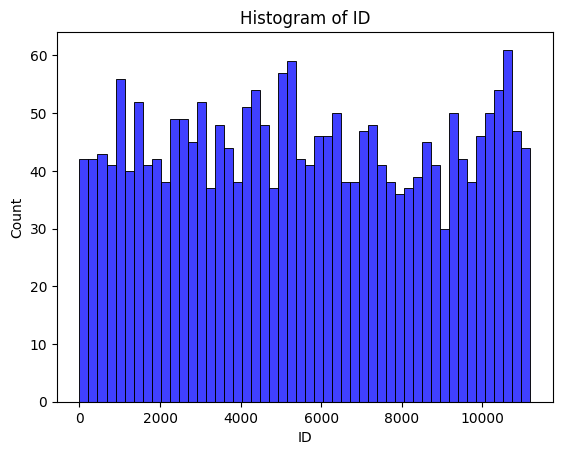

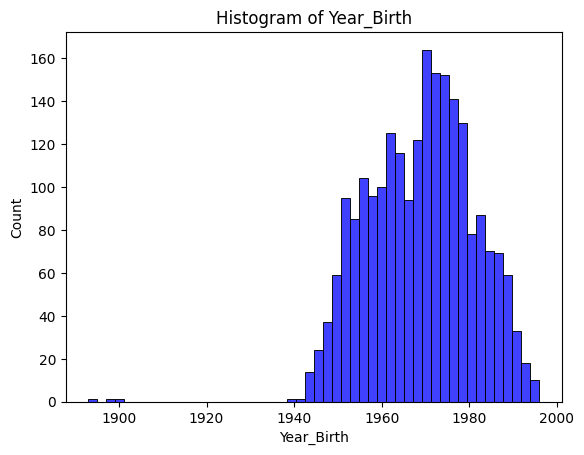

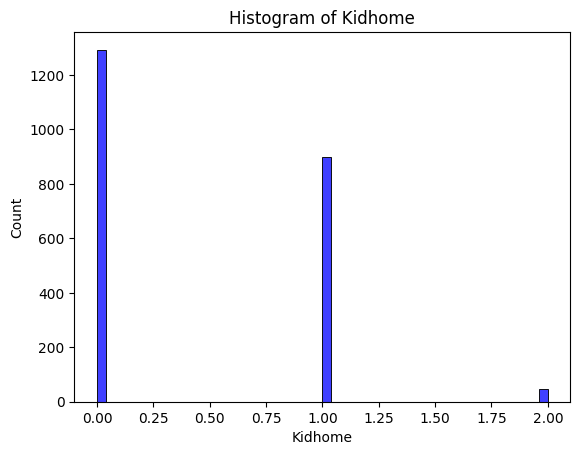

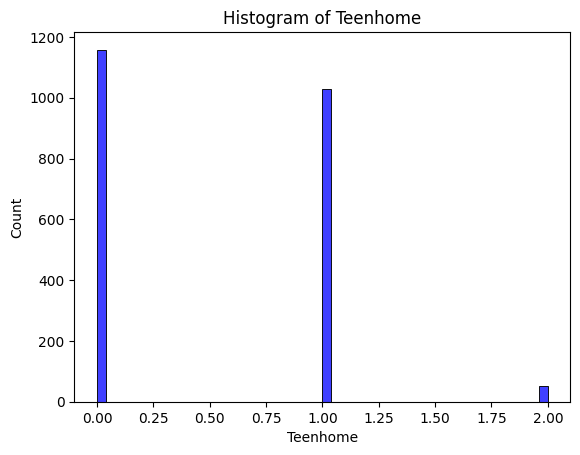

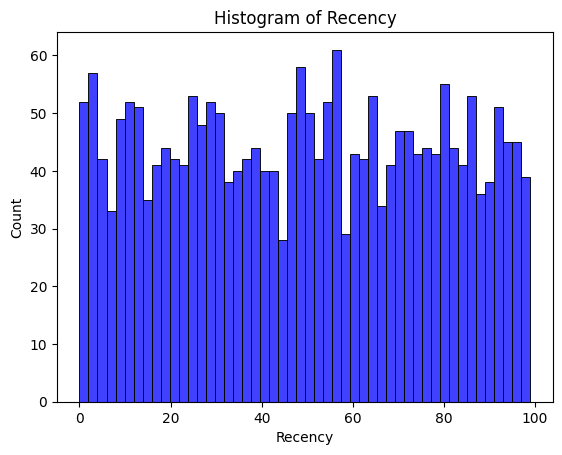

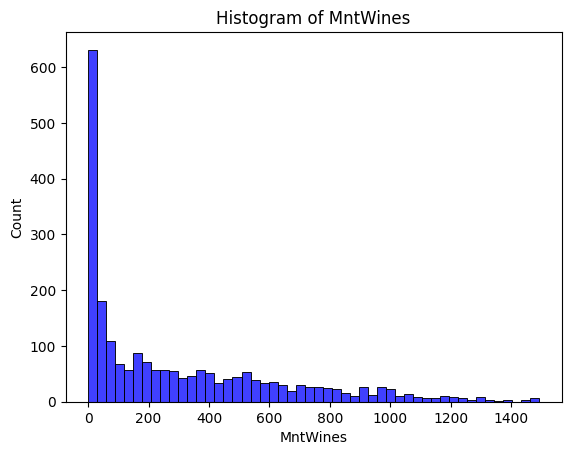

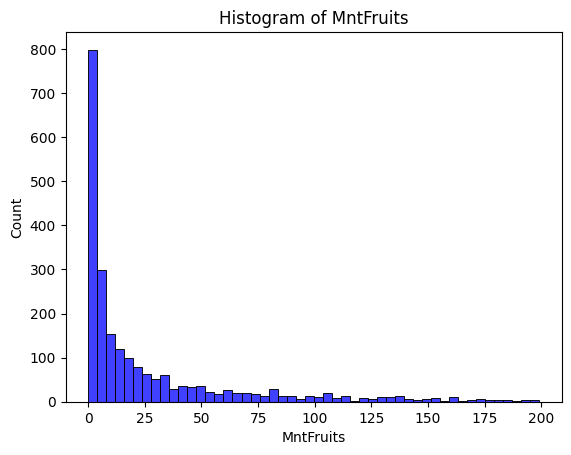

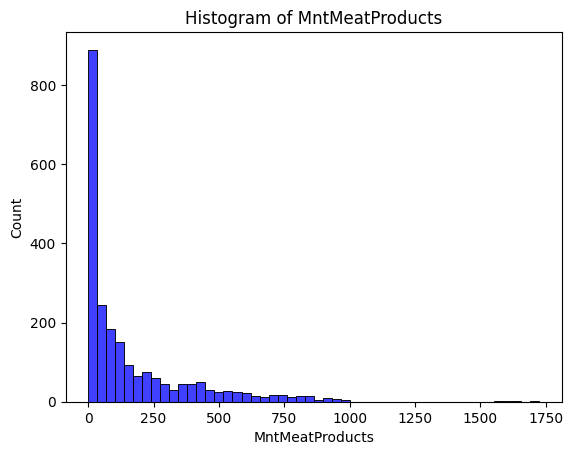

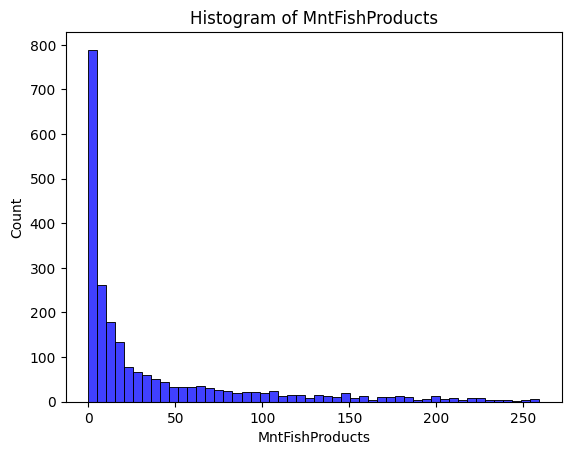

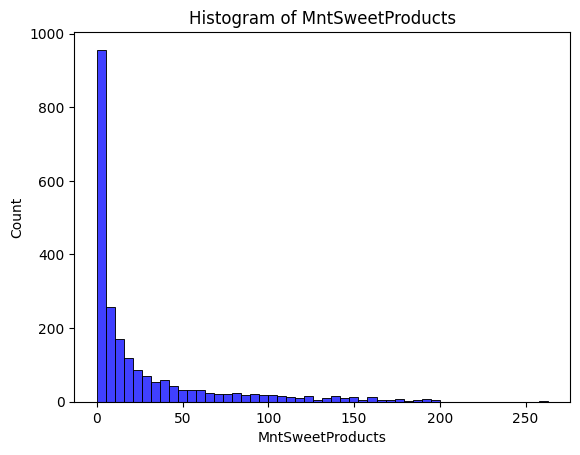

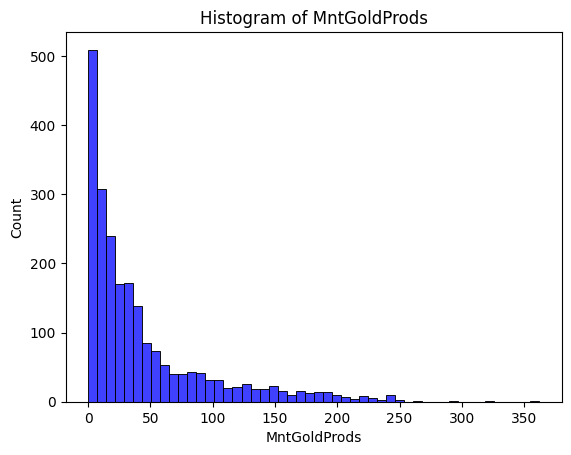

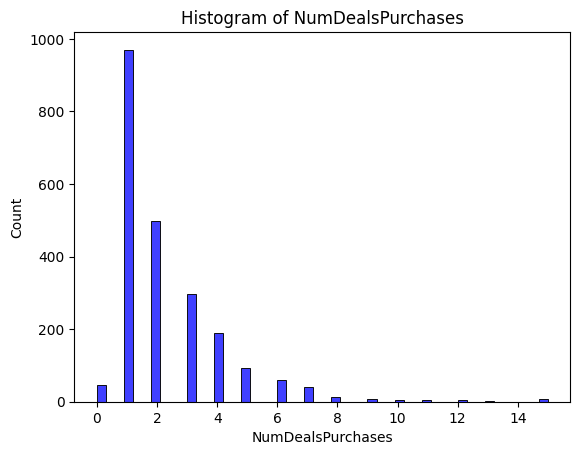

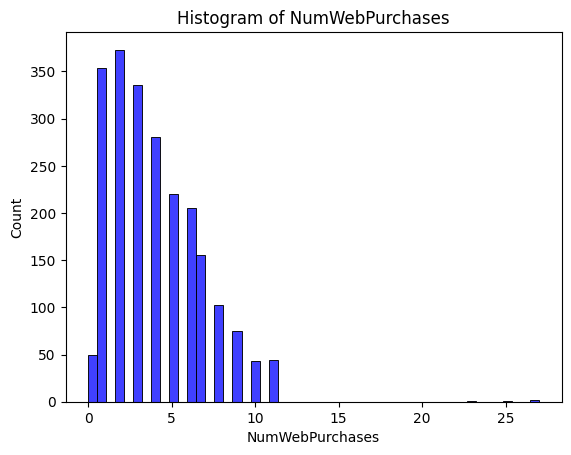

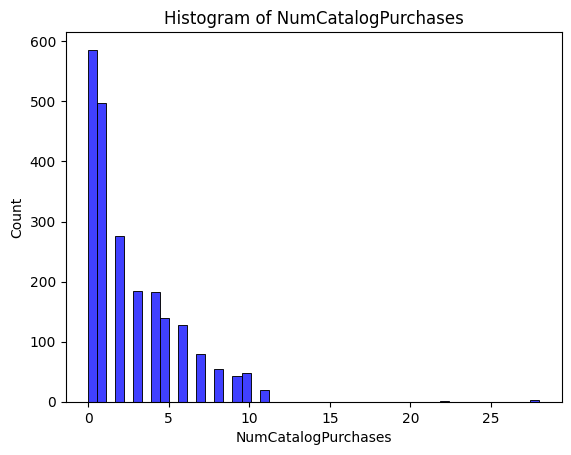

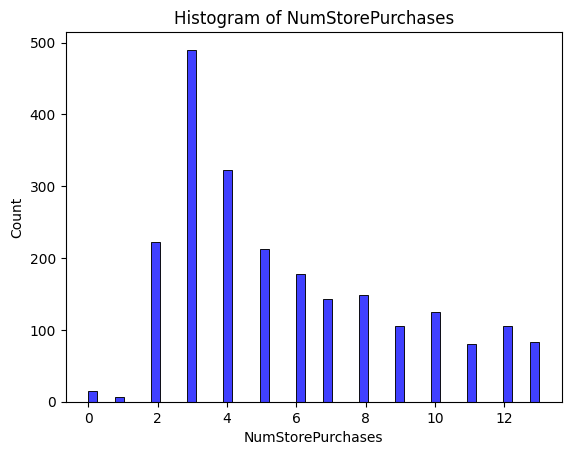

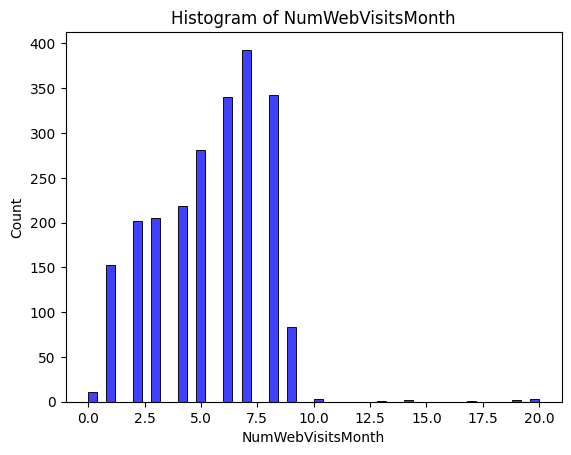

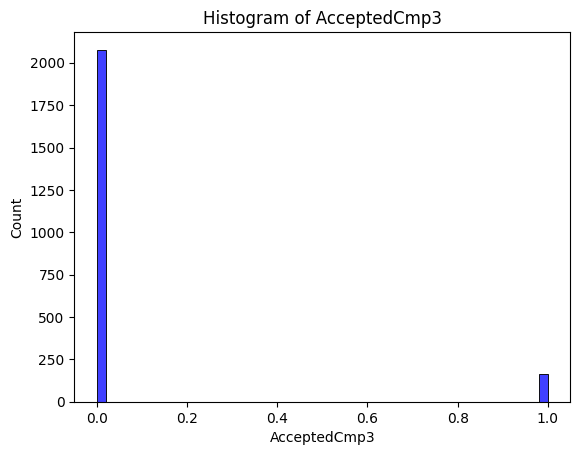

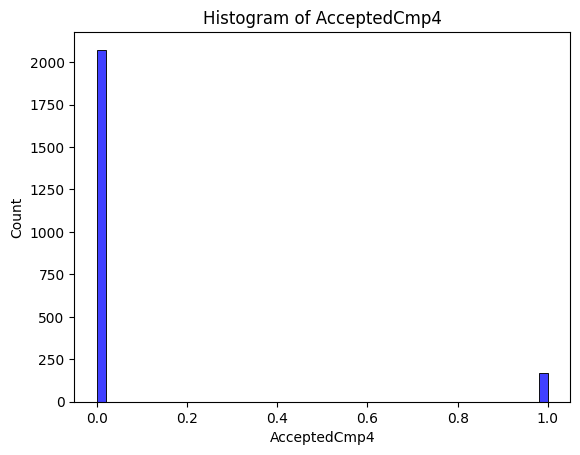

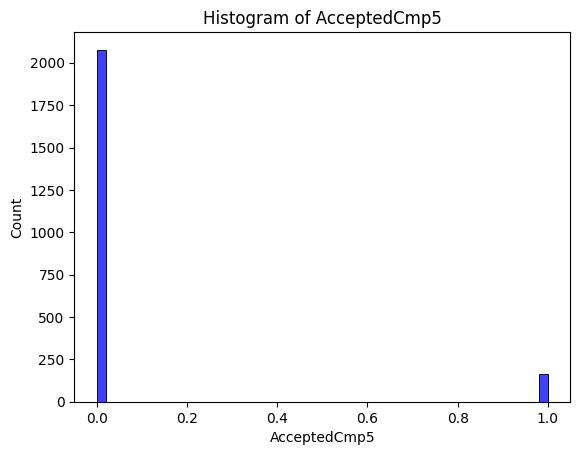

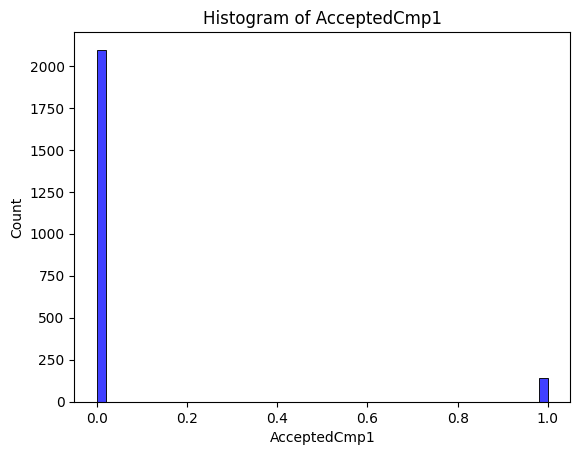

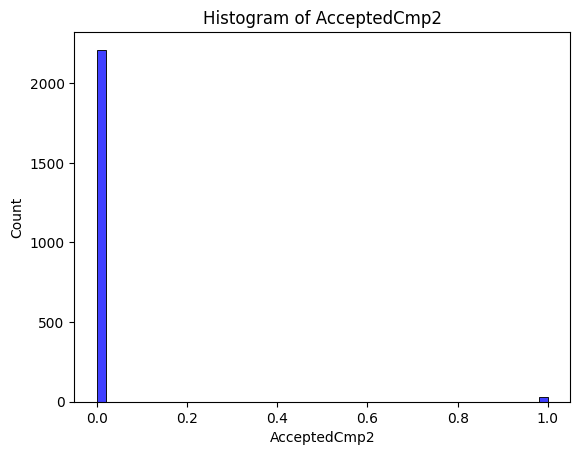

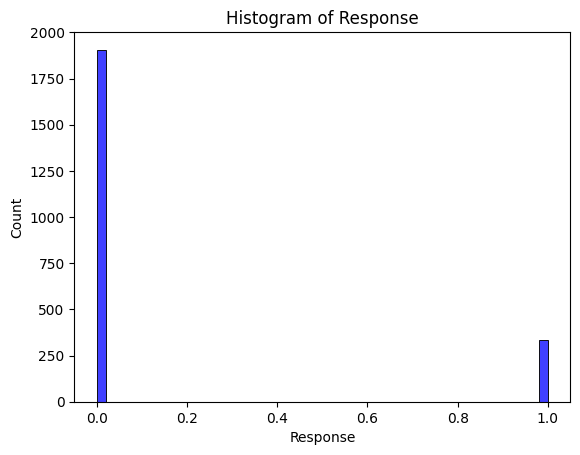

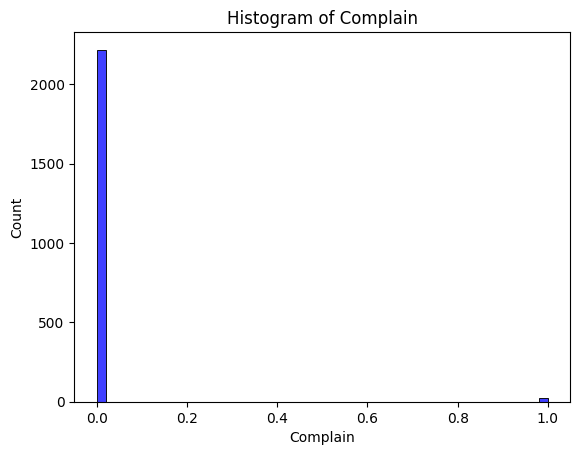

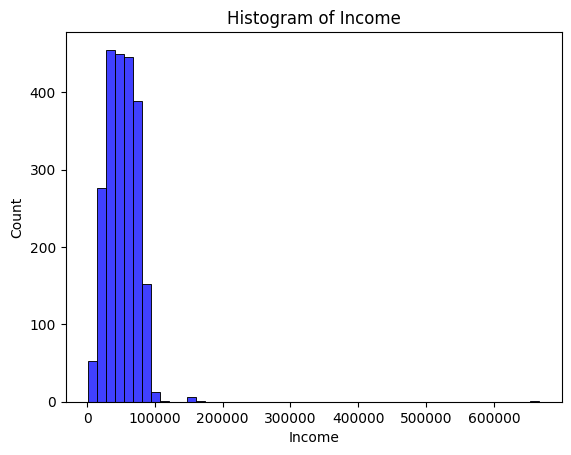

In [642]:
for feature in numerical_features:
    sns.histplot(x=feature, data=market_df, bins=50, color='blue')
    plt.title(f'Histogram of {feature}')

    plt.show()

### Recommended Actions
- Mnt and Num values are skewed right -> log transform
- Accepted and Complaints look like booleans -> convert to boolean
- Remove ID, kidhome, teenhome, Year birth, recency from numerical features these don't need to be there
- Remove accepted and complaint features from numerical features they are boolean as ints

## Evaluate Children vs Spending

In [643]:
pd.set_option('display.max_columns', None)
market_df.sample(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Education_encoded,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
1020,3665,1977,2n Cycle,Together,25315.0,1,0,11/7/13,46,1,9,8,11,3,22,3,3,0,3,8,0,0,0,0,0,0,0,SP,2.0,0.0,0.0,1.0,0.0
237,7628,1973,2n Cycle,Married,43050.0,1,0,3/18/14,10,30,5,24,6,3,8,2,2,0,4,5,0,0,0,0,0,0,0,SP,2.0,1.0,0.0,0.0,0.0
168,2870,1973,Graduation,Married,49094.0,0,1,9/21/12,6,376,0,38,11,8,69,5,6,3,6,6,0,0,0,0,0,0,0,SP,1.0,1.0,0.0,0.0,0.0
1456,3919,1976,Master,Single,72309.0,0,0,3/11/13,64,960,0,883,50,38,0,1,5,6,8,3,0,0,0,1,0,1,0,CA,3.0,0.0,1.0,0.0,0.0
1743,9426,1964,Master,Single,58308.0,0,1,1/12/13,77,691,0,69,10,0,130,4,2,6,3,8,0,0,0,0,0,0,0,SP,3.0,0.0,1.0,0.0,0.0
551,1175,1983,Master,Married,36262.0,0,0,9/20/13,24,88,39,54,64,28,153,1,3,5,3,6,1,0,0,0,0,1,0,SP,3.0,1.0,0.0,0.0,0.0
65,6287,1986,Graduation,Together,34728.0,1,0,7/30/13,2,14,0,16,0,0,6,1,1,1,2,6,0,0,0,0,0,1,0,SP,1.0,0.0,0.0,1.0,0.0
469,6422,1954,Graduation,Married,86718.0,0,0,1/17/13,20,344,189,482,50,33,172,1,5,6,5,2,0,0,0,0,0,0,0,IND,1.0,1.0,0.0,0.0,0.0
1751,10536,1971,PhD,Together,32892.0,1,0,5/25/14,78,26,0,15,2,1,2,2,3,0,3,8,0,0,0,0,0,0,0,SP,4.0,0.0,0.0,1.0,0.0
308,1891,1980,Master,Divorced,78789.0,0,0,8/8/12,12,667,50,850,21,83,83,1,4,6,5,2,0,0,0,0,0,1,0,SP,3.0,0.0,0.0,0.0,0.0


In [644]:
# pd.reset_option('display.max_columns')

### Adult ages
- Create Ages Feature
- Bin Ages by -> [0, 18, 25, 45, 65, 120]

In [645]:
#Extract age number
market_df['Age'] = 2025 - market_df['Year_Birth']

In [646]:
market_df['Age_Group'] = pd.cut(
    market_df['Age'],
    bins=[0, 18, 25, 45, 65, 120],
    labels=['Child', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
)

### Number of children
- Create Num_Children feature adding kid and teens
- Check if any age groups are 'Child'

In [647]:
market_df['Num_Children'] = market_df['Kidhome'] + market_df['Teenhome']

In [648]:
market_df[market_df['Age_Group'] == 'Child']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Education_encoded,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Age,Age_Group,Num_Children


### Totals Spending & Purchases
- Create Total_Spending feature adding all MnT features
- Create Total_purchases feature adding all Purchases 

In [649]:
spending_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
market_df['Total_Spending'] = market_df[spending_features].sum(axis=1)

In [650]:
purchase_features = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
market_df['Total_Purchases'] = market_df[purchase_features].sum(axis=1)

### Stats Ages, Children, Spending & Purchases
- Group num of children to check spending
- group age groups to check spending
- group both check spending

In [651]:
grouped_children_spending = market_df.groupby('Num_Children')['Total_Spending']

print('Spending statistics by num of children:')
grouped_children_spending.agg([
    'mean',
    'median',
    'std',
    'min',
    'max',
    'count'
])

Spending statistics by num of children:


,mean,median,std,min,max,count
Num_Children,,,,,,
0,1106.029781,1189.5,645.001438,6,2525,638
1,472.733156,305.0,478.000609,5,2194,1128
2,245.947743,93.0,311.328287,9,1750,421
3,274.603774,88.0,414.277051,8,1616,53


In [652]:
grouped_age_spending = market_df.groupby('Age_Group', observed=True)['Total_Spending']

print('Spending statistics by age groups:')
grouped_age_spending.agg([
    'mean',
    'median',
    'std',
    'min',
    'max',
    'count'
])

Spending statistics by age groups:


,mean,median,std,min,max,count
Age_Group,,,,,,
Adult,572.292453,175.0,659.960698,10,2525,424
Middle Age,563.909310,325.5,580.013008,5,2486,1246
Senior,722.689594,633.0,589.098085,8,2440,567


In [653]:
grouped_children_age_spending = market_df.groupby(['Num_Children', 'Age_Group'], observed=True)['Total_Spending']

print('Spending statistics by num of children and age groups:')
grouped_children_age_spending.agg([
    'mean',
    'median',
    'std',
    'min',
    'max',
    'count'
])

Spending statistics by num of children and age groups:


mean  median         std  min   max  count
Num_Children Age_Group                                                    
0            Adult       1057.589189  1173.0  684.818346   15  2525    185
             Middle Age  1152.289157  1240.0  641.827209    6  2486    249
             Senior      1089.753695  1157.0  609.240518    8  2440    203
1            Adult        194.739910    70.0  297.716708   10  1761    223
             Middle Age   498.573117   326.0  491.900901    5  2194    677
             Senior       673.429204   605.5  457.518822   15  2092    226
2            Adult        223.187500    93.5  253.061052   10   727     16
             Middle Age   245.177083    98.0  305.126980    9  1750    288
             Senior       250.957265    89.0  334.975846   11  1695    117
3            Middle Age   236.437500    79.5  385.388864    8  1562     32
             Senior       332.761905   106.0  458.400470   10  1616     21

In [654]:
grouped_children_purchases = market_df.groupby('Num_Children')['Total_Purchases']

print('Purchase statistics by num of children:')
grouped_children_purchases.agg([
    'mean',
    'median',
    'std',
    'min',
    'max',
    'count'
])

Purchase statistics by num of children:


,mean,median,std,min,max,count
Num_Children,,,,,,
0,17.556426,19.0,6.590449,0,44,638
1,14.480496,14.0,7.949685,0,43,1128
2,12.201900,10.0,7.206452,1,39,421
3,11.679245,9.0,7.531405,4,29,53


In [655]:
grouped_age_purchases = market_df.groupby('Age_Group', observed=True)['Total_Purchases']

print('Purchase statistics by age groups:')
grouped_age_purchases.agg([
    'mean',
    'median',
    'std',
    'min',
    'max',
    'count'
])

Purchase statistics by age groups:


,mean,median,std,min,max,count
Age_Group,,,,,,
Adult,12.948113,11.0,7.333472,2,44,424
Middle Age,14.715088,15.0,7.798458,0,43,1246
Senior,16.650794,17.0,7.269285,0,35,567


In [656]:
grouped_children_age_purchases = market_df.groupby(['Num_Children', 'Age_Group'], observed=True)['Total_Purchases']

print('Purchases statistics by num of children and age groups:')
grouped_children_age_purchases.agg([
    'mean',
    'median',
    'std',
    'min',
    'max',
    'count'
])

Purchases statistics by num of children and age groups:


mean  median       std  min  max  count
Num_Children Age_Group                                               
0            Adult       16.983784    18.0  7.178225    2   44    185
             Middle Age  17.610442    19.0  6.358006    0   30    249
             Senior      18.024631    19.0  6.312363    0   32    203
1            Adult        9.699552     8.0  5.687377    4   30    223
             Middle Age  14.856721    14.0  8.206029    0   43    677
             Senior      18.154867    19.0  6.698451    1   35    226
2            Adult       11.562500     9.0  6.782023    4   25     16
             Middle Age  12.281250    10.0  7.123651    1   39    288
             Senior      12.094017     9.0  7.513187    2   33    117
3            Middle Age  11.093750     9.0  6.668943    4   29     32
             Senior      12.571429     9.0  8.783914    4   29     21

### Visuals Ages, Children, Spending & Purchases

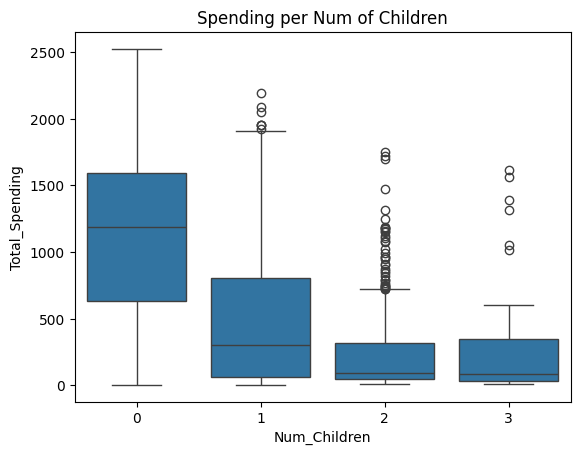

In [657]:
sns.boxplot(x='Num_Children', y='Total_Spending', data=market_df)
plt.title('Spending per Num of Children')

plt.show()

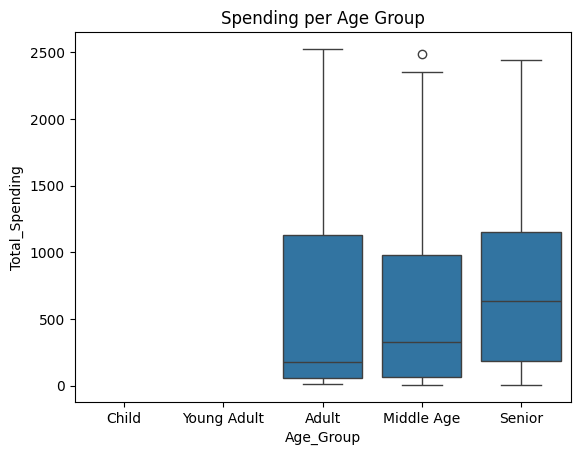

In [658]:
sns.boxplot(x='Age_Group', y='Total_Spending', data=market_df)
plt.title('Spending per Age Group')

plt.show()

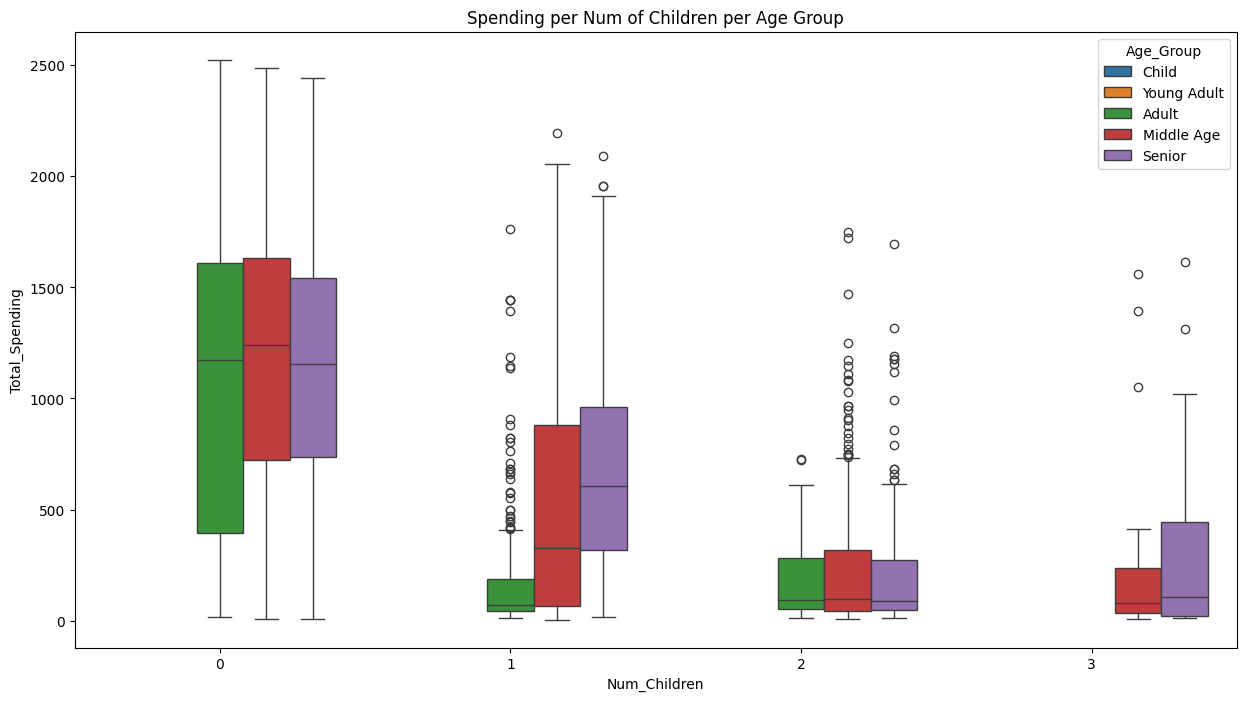

In [659]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Num_Children', y='Total_Spending', data=market_df, hue='Age_Group')
plt.title('Spending per Num of Children per Age Group')


plt.show()

### Observation
- People with no children spend and purchase the most on average despite not being the majority count of the data
- Seniors spend and purchase the most on average, but this could be due to living longer so they accumulated more. Should compare this with DT_Customer to see actual patterns.

## Evaluate DT Customer vs Spending

In [660]:
market_df.sample(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Education_encoded,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Age,Age_Group,Num_Children,Total_Spending,Total_Purchases
1433,1993,1949,PhD,Married,58607.0,0,1,12/23/12,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,0,0,US,4.0,1.0,0.0,0.0,0.0,76,Senior,1,972,17
972,3783,1959,PhD,Married,52854.0,1,1,3/24/14,43,105,0,10,0,1,0,2,2,1,4,5,0,0,0,0,0,0,0,SA,4.0,1.0,0.0,0.0,0.0,66,Senior,2,116,9
315,3050,1966,Graduation,Married,54198.0,1,1,12/17/13,13,185,0,28,3,2,17,6,3,1,6,4,0,0,0,0,0,0,0,SP,1.0,1.0,0.0,0.0,0.0,59,Middle Age,2,235,16
479,9150,1963,PhD,Single,48918.0,1,1,4/12/14,21,52,0,9,0,0,1,2,1,0,4,4,0,0,0,0,0,0,0,SP,4.0,0.0,1.0,0.0,0.0,62,Middle Age,2,62,7
108,8278,1990,PhD,Married,74214.0,0,0,8/26/12,3,863,83,547,86,99,33,1,8,2,5,5,0,0,0,0,0,0,0,SP,4.0,1.0,0.0,0.0,0.0,35,Adult,0,1711,16
817,35,1987,Graduation,Married,25545.0,1,0,9/8/12,35,32,1,64,16,12,85,3,2,2,3,6,0,0,0,0,0,1,0,SP,1.0,1.0,0.0,0.0,0.0,38,Adult,1,210,10
56,4877,1973,Master,Married,38576.0,0,1,3/4/14,2,34,0,7,0,0,0,1,1,0,3,7,0,0,0,0,0,0,0,IND,3.0,1.0,0.0,0.0,0.0,52,Middle Age,1,41,5
856,11100,1972,Graduation,Divorced,51813.0,1,1,4/11/13,37,51,2,7,0,1,2,2,2,0,3,7,0,0,0,0,0,0,0,CA,1.0,0.0,0.0,0.0,0.0,53,Middle Age,2,63,7
28,453,1956,PhD,Widow,35340.0,1,1,6/29/14,1,27,0,12,0,1,5,2,2,0,3,5,0,0,0,0,0,0,0,SP,4.0,0.0,0.0,0.0,1.0,69,Senior,2,45,7
340,1577,1946,Graduation,Married,78569.0,0,0,2/19/14,14,558,79,622,207,175,95,1,4,6,4,1,0,0,1,0,0,1,0,SP,1.0,1.0,0.0,0.0,0.0,79,Senior,0,1736,15


### Convert and Extract Dt_Customer
- convert to date time
- create Customer_Tenure_Months feature to see how long they've been a customer (treating it like age)

In [661]:
market_df['Dt_Customer'] = pd.to_datetime(market_df['Dt_Customer'], format='%m/%d/%y')

In [662]:
market_df['Customer_Tenure_Months'] = (pd.Timestamp.today() - market_df['Dt_Customer'])
market_df['Customer_Tenure_Months'] = (market_df['Customer_Tenure_Months'].dt.days / 30).astype(int)

### Visualize Correlation 
- Make a correlation
- Graph the heatmap correlation

In [663]:
corr = market_df[[
    'Customer_Tenure_Months',
    'Age',
    'Num_Children',
    'Total_Spending',
    'Total_Purchases',
    *spending_features,
    *purchase_features
]].corr()

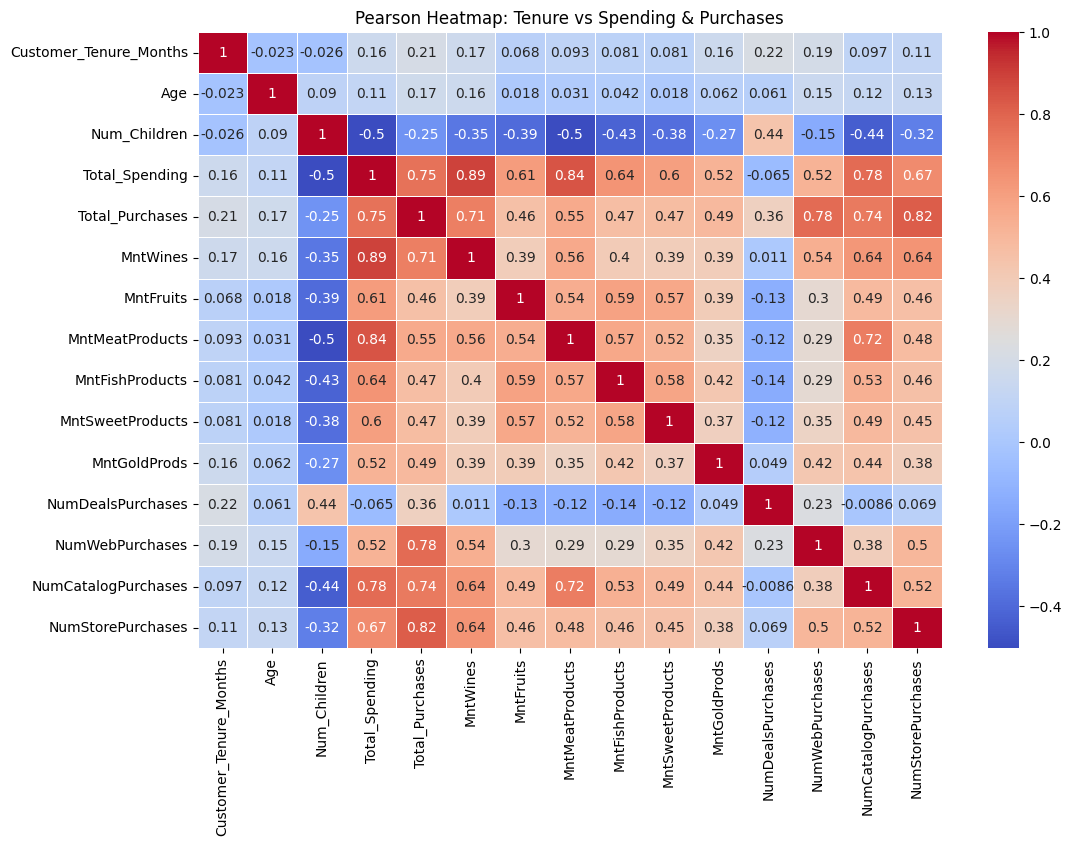

In [664]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Heatmap: Tenure vs Spending & Purchases')

plt.show()

In [665]:
corr = market_df[[
    'Customer_Tenure_Months',
    'Age',
    'Num_Children',
    'Total_Spending',
    'Total_Purchases',
    *spending_features,
    *purchase_features
]].corr(method='spearman')

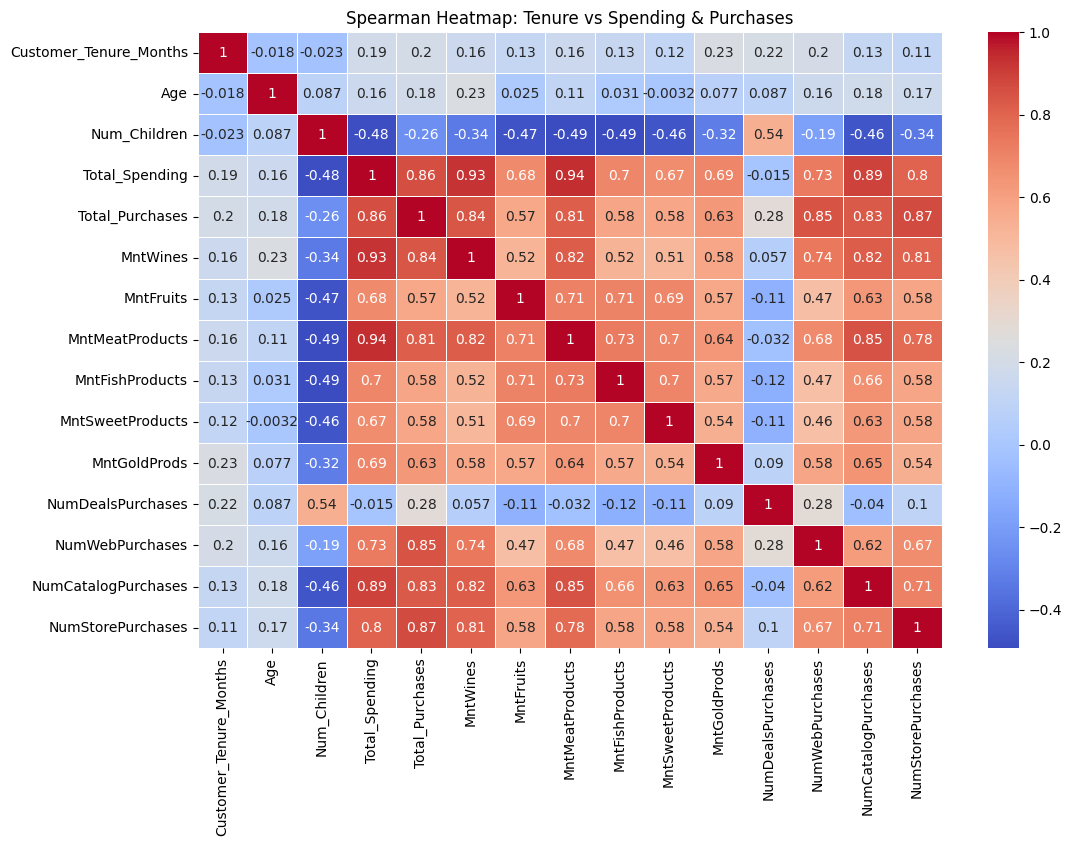

In [666]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Heatmap: Tenure vs Spending & Purchases')

plt.show()

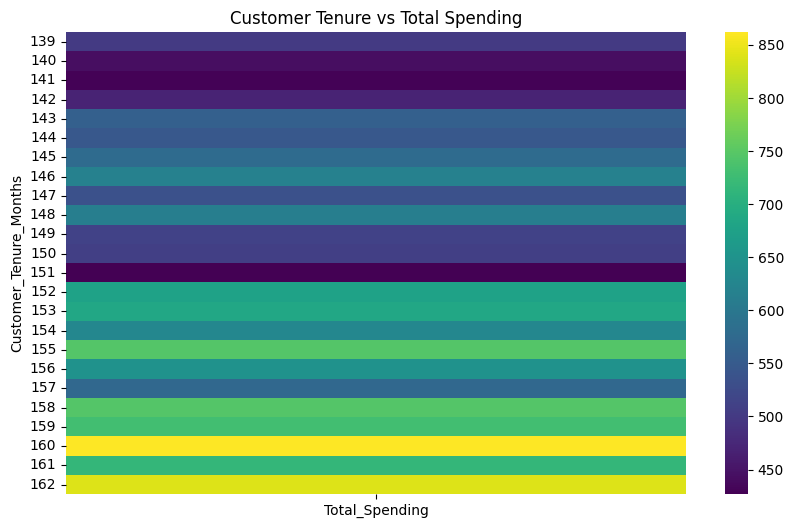

In [667]:
heatmap_data = (
    market_df.groupby('Customer_Tenure_Months')['Total_Spending']
      .mean()
      .reset_index()
      .pivot_table(
          values='Total_Spending',
          index='Customer_Tenure_Months',
          aggfunc='mean'
      )
)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Customer Tenure vs Total Spending')
plt.show()


### Observation
- Looks like the correlation between tenure and spending is very weak
- Looking at the Tenure lengths, looks like the newer customers are spending more than the longer ones, this could be from the market expanding or lack of long time customers
- Spearman correlation is showing us a strong correlation for spending patterns with products and num of children that make sense from our grouped data before
- Let's note some of the correlations: 
    - Spending increases the most on wine and meat as it goes up
    - Spending decreases the most on num of children
    - NumDealsPurchased increases with Num of Children, this could be due to wanting to save on food

## Hypotheses
1. Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.
2. Customers with children likely experience time constraints, making online shopping a more convenient option.
3. Sales at physical stores may face the risk of cannibalization by alternative distribution channels.
4. Does the United States significantly outperform the rest of the world in total purchase volumes?

### Age vs StorePurchases & WebPurchases

In [668]:
grouped_ages_store_purchases = market_df.groupby('Age_Group', observed=True)['NumStorePurchases']

print('Store Purchases statistics by age groups:')
grouped_ages_store_purchases.agg([
    'mean',
    'median',
    'std',
    'min',
    'max',
    'count'
])

Store Purchases statistics by age groups:


,mean,median,std,min,max,count
Age_Group,,,,,,
Adult,5.278302,4.0,3.201344,0,13,424
Middle Age,5.690209,5.0,3.272426,0,13,1246
Senior,6.409171,6.0,3.151945,0,13,567


In [669]:
grouped_ages_web_purchases = market_df.groupby('Age_Group', observed=True)['NumWebPurchases']

print('Web Purchases statistics by age groups:')
grouped_ages_web_purchases.agg([
    'mean',
    'median',
    'std',
    'min',
    'max',
    'count'
])

Web Purchases statistics by age groups:


,mean,median,std,min,max,count
Age_Group,,,,,,
Adult,3.492925,3.0,2.640823,0,27,424
Middle Age,4.049759,3.0,2.742923,0,25,1246
Senior,4.613757,4.0,2.865788,0,27,567


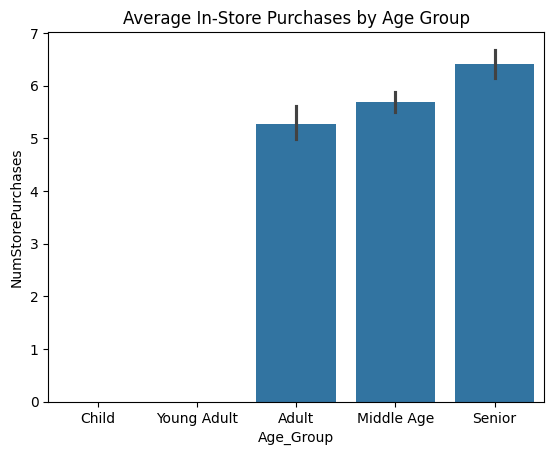

In [670]:
sns.barplot(x="Age_Group", y="NumStorePurchases", data=market_df)
plt.title("Average In-Store Purchases by Age Group")

plt.show()

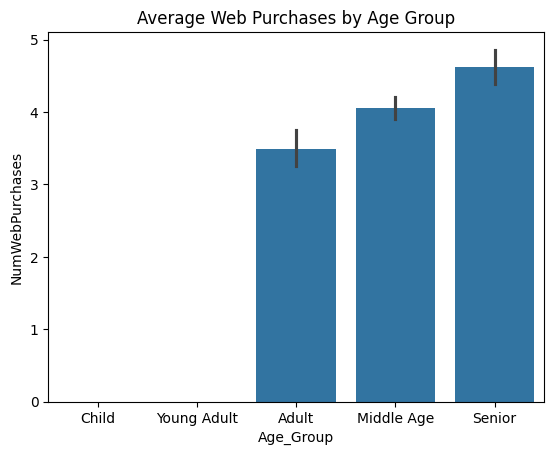

In [671]:
sns.barplot(x="Age_Group", y="NumWebPurchases", data=market_df)
plt.title("Average Web Purchases by Age Group")

plt.show()

In [672]:
store_spearman_r, store_spearman_p = stats.spearmanr(market_df['Age'], market_df['NumStorePurchases'])
web_spearman_r, web_spearman_p = stats.spearmanr(market_df['Age'], market_df['NumWebPurchases'])

print(f'Age vs In-Store purchases correlation: {store_spearman_r}\n')
print(f'Age vs In-Store purchases p-value: {store_spearman_p}\n')
print(f'Age vs Web purchases correlation: {web_spearman_r}\n')
print(f'Age vs Web purchases p-value: {web_spearman_p}')


Age vs In-Store purchases correlation: 0.16764586356410166

Age vs In-Store purchases p-value: 1.3870346729928577e-15

Age vs Web purchases correlation: 0.16441569734000838

Age vs Web purchases p-value: 4.856515637599616e-15


#### Conclusion
- Null Hypothesis: There is no relationship between age and In-store purchases

Looking at the correlations and graphs we can reject the null hypothesis that older people lean towards in-store purchases. They do shop more in-store and are related. Although, through web purchasing comparison, we can also say their age isn't the reason, they also lean towards online purchasing with a weak correlation.

### Num of Children vs Online Shopping

In [673]:
grouped_ages_store_purchases = market_df.groupby('Num_Children')['NumWebPurchases']

print('Web Purchases statistics by number of children:')
grouped_ages_store_purchases.agg([
    'mean',
    'median',
    'std',
    'min',
    'max',
    'count'
])

Web Purchases statistics by number of children:


,mean,median,std,min,max,count
Num_Children,,,,,,
0,4.393417,4.0,2.483304,0,27,638
1,4.285461,4.0,2.942224,0,27,1128
2,3.232779,2.0,2.588982,0,23,421
3,2.867925,2.0,2.394206,0,11,53


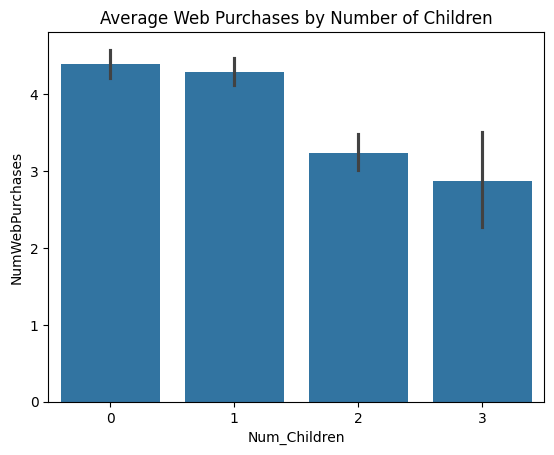

In [674]:
sns.barplot(x="Num_Children", y="NumWebPurchases", data=market_df)
plt.title("Average Web Purchases by Number of Children")

plt.show()

In [675]:
web_spearman_r, web_spearman_p = stats.spearmanr(market_df['Num_Children'], market_df['NumWebPurchases'])
store_spearman_r, store_spearman_p = stats.spearmanr(market_df['Num_Children'], market_df['NumStorePurchases'])

print(f'Num of Children vs Web purchases correlation: {web_spearman_r}\n')
print(f'Num of Children vs Web purchases p-value: {web_spearman_p}\n')
print(f'Num of Children vs Store purchases correlation: {store_spearman_r}\n')
print(f'Num of Children vs Store purchases p-value: {store_spearman_p}')

Num of Children vs Web purchases correlation: -0.18545111394901473

Num of Children vs Web purchases p-value: 8.821613870728844e-19

Num of Children vs Store purchases correlation: -0.34015705825550363

Num of Children vs Store purchases p-value: 8.610784510790215e-62


#### Conclusion
- Null Hypothesis: There is no relationship between number of children and online purchases.

Looking at the correlations and graphs we reject the null hypothesis that the number of children is not related to online purchases. They tend to shop less online and are related. This could be due to harder time management and not being able to search for items, and would rather go in-store showing from the stronger correlation. Or it could be overall less money to spend. 

### In-store sales vs other distributors

In [676]:
distribution_channels = ['NumWebPurchases', 'NumDealsPurchases', 'NumCatalogPurchases']

for distribution in distribution_channels:
    spearman_r, spearman_p = stats.spearmanr(market_df[distribution], market_df['NumStorePurchases'])

    print(f'{distribution} vs Store purchases correlation: {spearman_r}')
    print(f'{distribution} vs Store purchases p-value: {spearman_p}\n')

NumWebPurchases vs Store purchases correlation: 0.672625031271003
NumWebPurchases vs Store purchases p-value: 5.222269358996035e-295

NumDealsPurchases vs Store purchases correlation: 0.0996288704855813
NumDealsPurchases vs Store purchases p-value: 2.307674655729222e-06

NumCatalogPurchases vs Store purchases correlation: 0.7086124704074876
NumCatalogPurchases vs Store purchases p-value: 0.0



#### Conclusion
- Null Hypothesis: There is no relationship between physical stores and other distributors.

Looking at the correlations we reject the null hypothesis of cannibalization the physical store purchases are increased WITH the other distributors. They are all positive and compliment each other, customers buy from one distributor are more likely to buy from others. 

### US purchases vs Other Countries purchases

In [677]:
market_df['Country'].value_counts()

Country
SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: count, dtype: int64

In [678]:
#Use whitney U test here since we have independent categories  
usa = market_df[market_df['Country'] == 'US']['Total_Purchases']
non_usa = market_df[market_df['Country'] != 'US']['Total_Purchases']

stat, p = stats.mannwhitneyu(usa, non_usa, alternative='greater')
print(f'Stats from Whitney U: {stat}')
print(f'p-value from Whitney U: {p}')

Stats from Whitney U: 126538.0
p-value from Whitney U: 0.05701718533713933


#### Conclusion 
- Null Hypothesis: There is no difference in total purchases in the United States compared to the rest of the world.

Looking at the p values from Whitney U we can not reject the null hypothesis that the US has higher purchases than any other country. 

## Analyze Specific Data
Analyze the following:
- Identify the top-performing products and those with the lowest revenue.
- Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.
- Determine the country with the highest number of customers who accepted the last campaign.
- Investigate if there is a discernible pattern in the number of children at home and the total expenditure.
- Analyze the educational background of customers who lodged complaints in the last two years.

### Top products vs Lowest products

In [679]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

product_totals = market_df[products].sum().sort_values(ascending=False)
product_totals

MntWines            680816
MntMeatProducts     373968
MntGoldProds         98609
MntFishProducts      84057
MntSweetProducts     60621
MntFruits            58917
dtype: int64

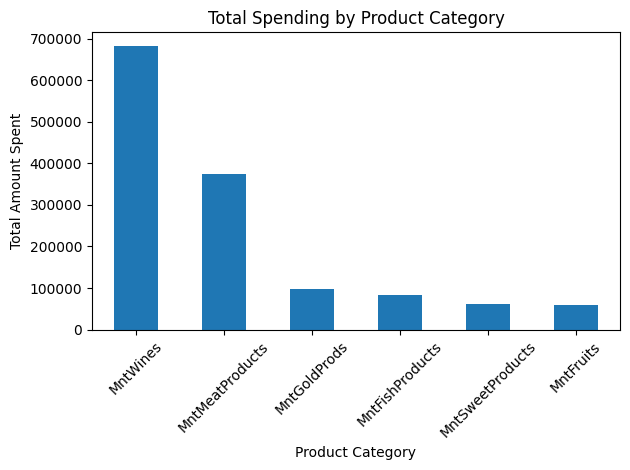

In [680]:
product_totals.plot(kind='bar')
plt.title('Total Spending by Product Category')
plt.ylabel('Total Amount Spent')
plt.xlabel('Product Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Age vs Acceptance Campaign 5

In [681]:
#Found a correlation for booleans called Point-Biserial Correlation
corr, p = stats.pointbiserialr(market_df['Age'], market_df['AcceptedCmp5'].astype(bool))

print(f'Point biserial correlation: {corr}')
print(f'Point biserial p-value: {p}')

Point biserial correlation: -0.007122541535987478
Point biserial p-value: 0.7361799952148979


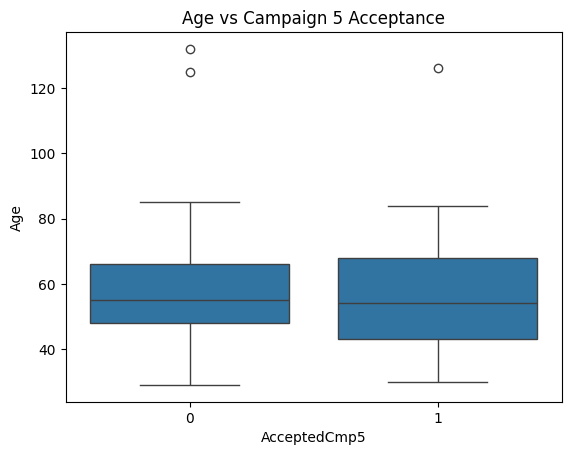

In [682]:
sns.boxplot(x='AcceptedCmp5', y='Age', data=market_df)
plt.title('Age vs Campaign 5 Acceptance')

plt.show()

For this we can not reject the Null Hypothesis. Age has no relationship to whether campaign 5 is accepted or not.

### Highest Country Customers who Accepted Campaign 5

In [683]:
accepted_cmp5 = market_df[market_df['AcceptedCmp5'] == 1]

# Count accepted per country
country_accept_counts = accepted_cmp5['Country'].value_counts()

country_accept_counts


Country
SP     89
CA     21
SA     21
AUS    13
GER     8
IND     6
US      5
Name: count, dtype: int64

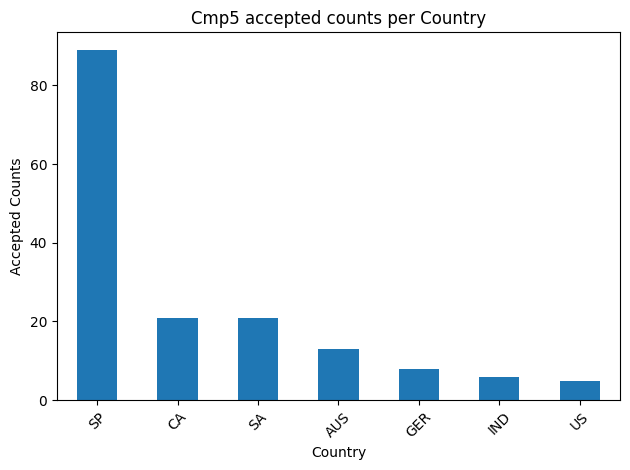

In [684]:
country_accept_counts.plot(kind='bar')
plt.title('Cmp5 accepted counts per Country')
plt.ylabel('Accepted Counts')
plt.xlabel('Country')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Education vs Complaints 

In [685]:
#Category vs category we can use the chi2 test
contingency = pd.crosstab(market_df['Education'], market_df['Complain'])
print('\nContingency Table:\n', contingency)

chi2, p, dof, expected = stats.chi2_contingency(contingency)

print('\nChi-square statistic:', chi2)
print('p-value:', p)


Contingency Table:
 Complain       0   1
Education           
2n Cycle     199   4
Basic         54   0
Graduation  1113  14
Master       368   2
PhD          485   1

Chi-square statistic: 7.399956075993101
p-value: 0.11620258344593623


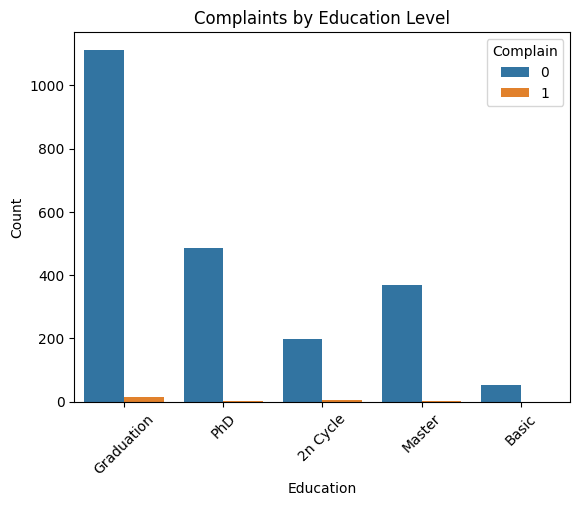

In [686]:
sns.countplot(x='Education', data=market_df, hue='Complain')
plt.title('Complaints by Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

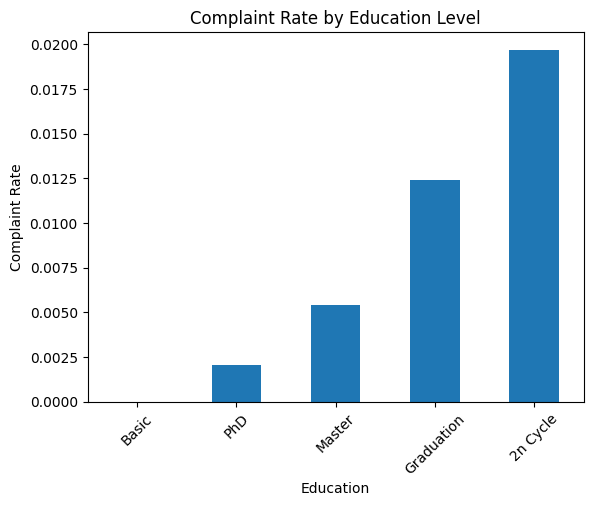

In [687]:
#We showing the average rate of complaints as well since the counts are skewed 
rate = df.groupby('Education')['Complain'].mean().sort_values()

rate.plot(kind='bar')
plt.title('Complaint Rate by Education Level')
plt.ylabel('Complaint Rate')
plt.xticks(rotation=45)
plt.show()

## Feature Scaling

In [688]:
market_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Education_encoded',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'Age', 'Age_Group',
       'Num_Children', 'Total_Spending', 'Total_Purchases',
       'Customer_Tenure_Months'],
      dtype='object')

In [689]:
numerical_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

numerical_features

['Income',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [690]:
for feature in numerical_features:
    market_df[f'{feature}_logged'] = np.log1p(market_df[feature])

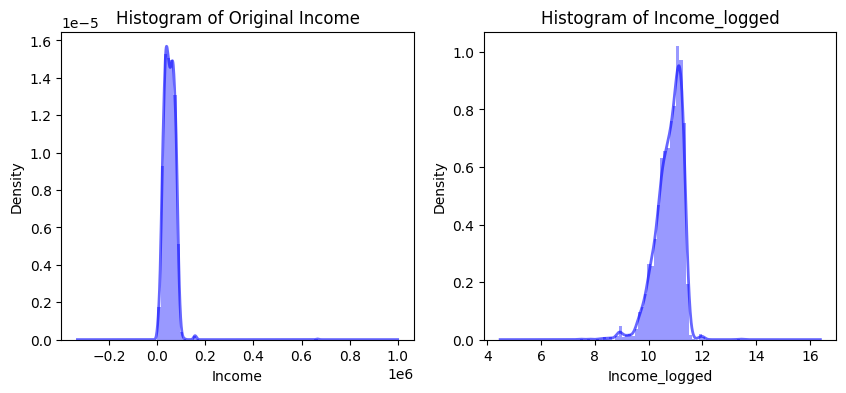

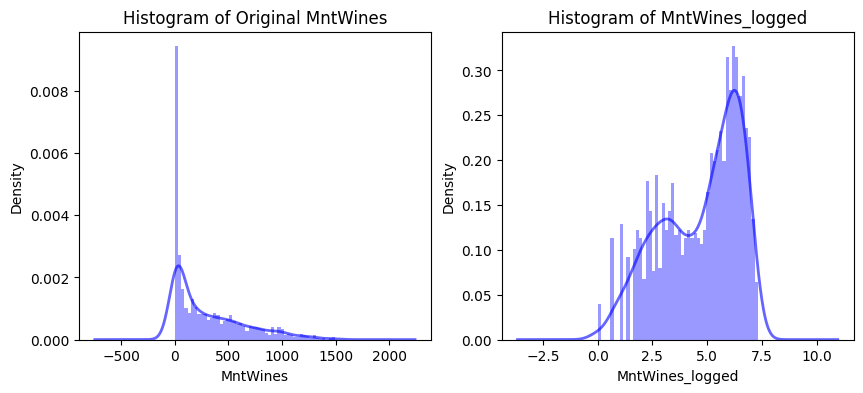

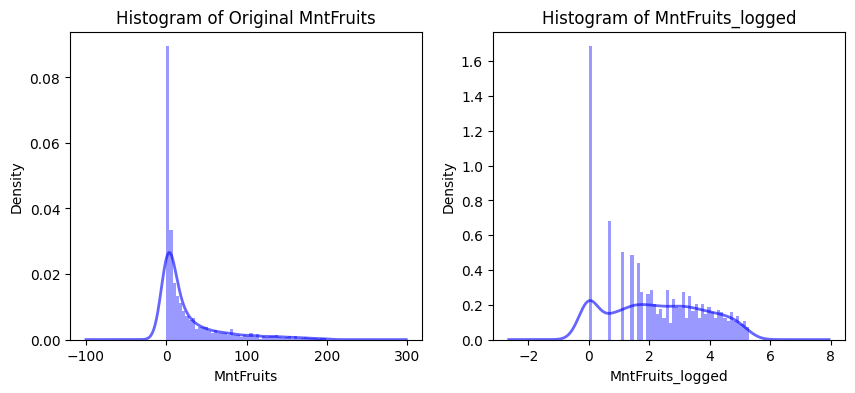

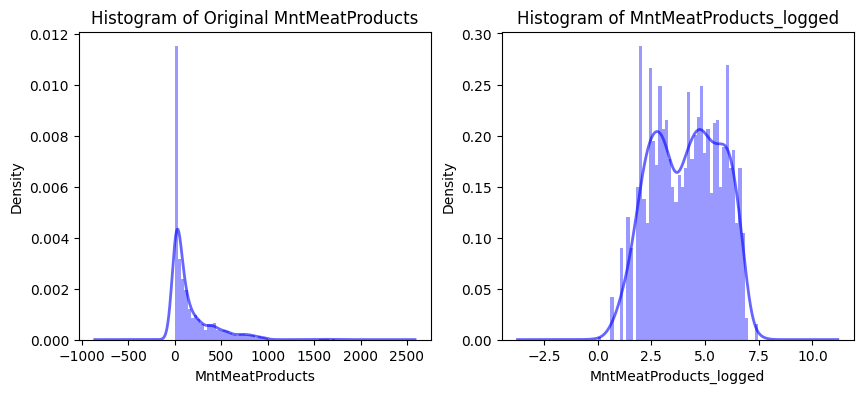

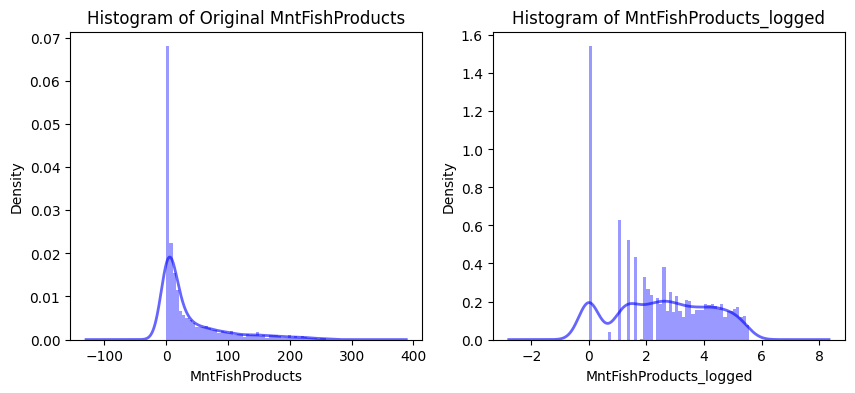

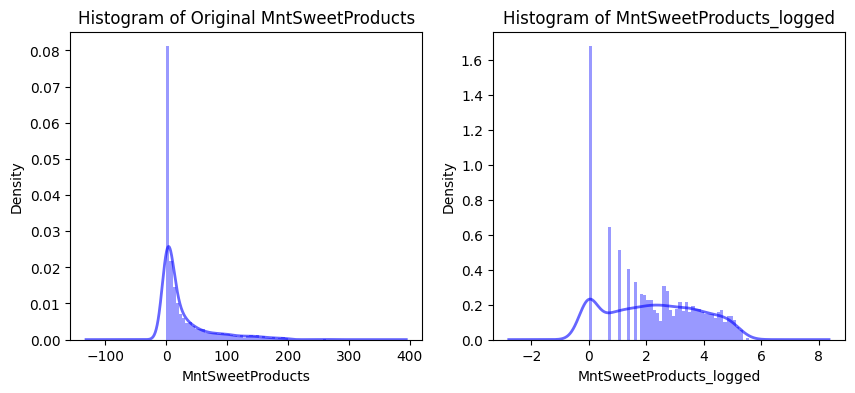

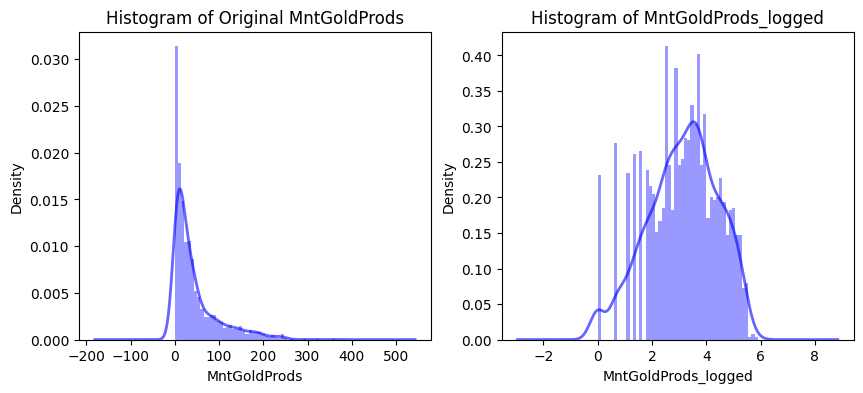

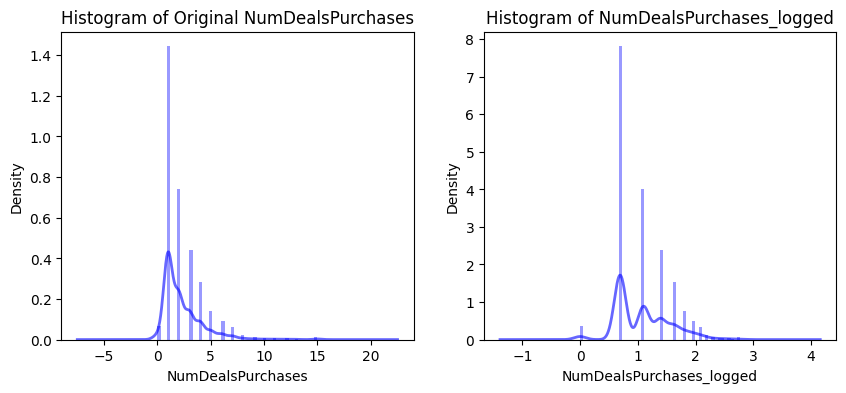

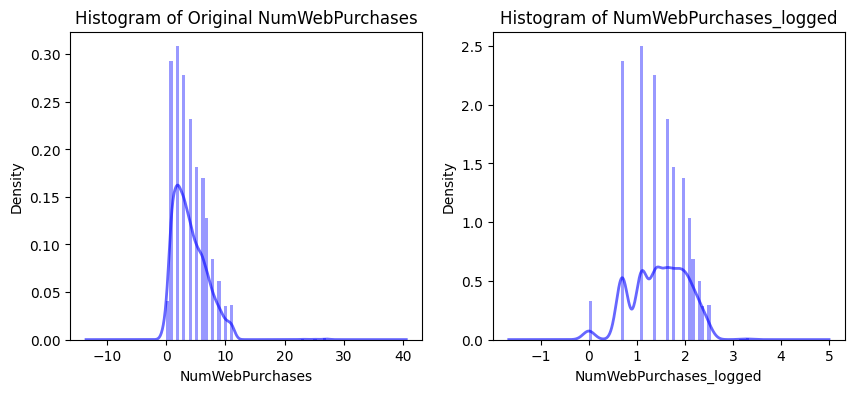

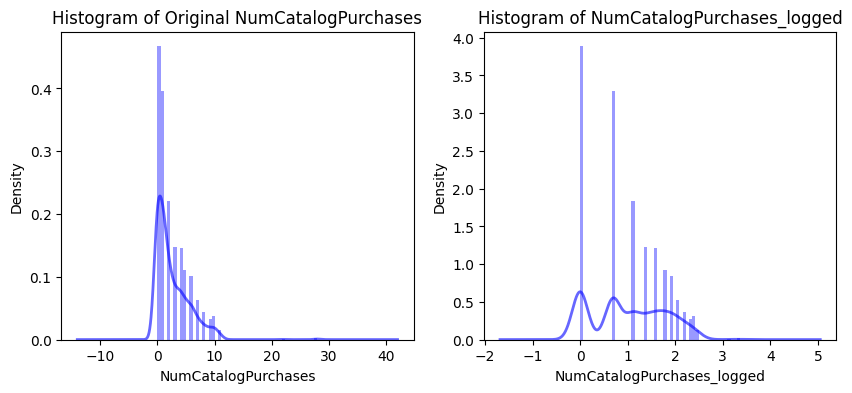

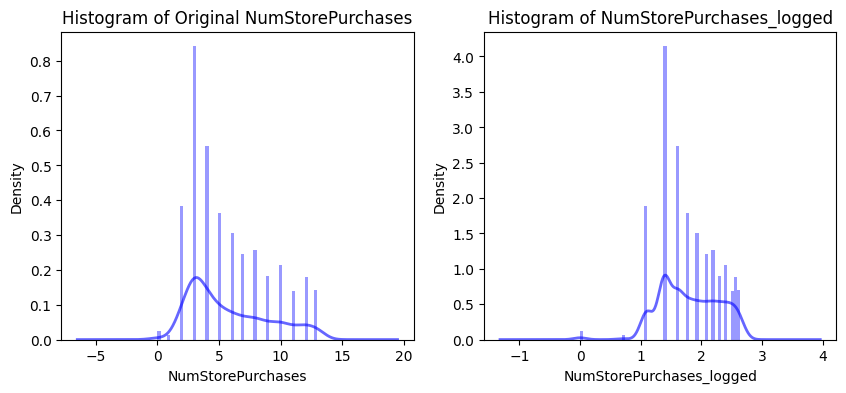

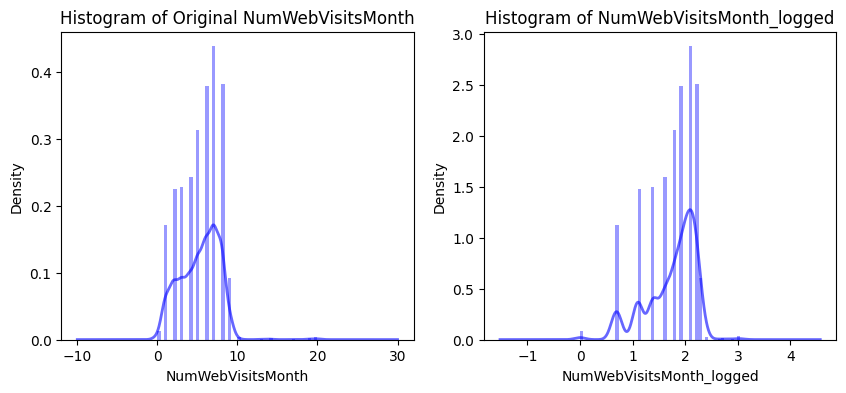

In [691]:
for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    axes[0].hist(x=f'{feature}', data=market_df, bins=50, color='blue', alpha=0.4, density=True)
    market_df[f'{feature}'].plot(kind='density', ax=axes[0], linewidth=2, label=f'{feature} PDF', color='blue', alpha=0.6)
    axes[0].set_title(f'Histogram of Original {feature}')
    axes[0].set_xlabel(f'{feature}')
    axes[0].set_ylabel('Density')

    axes[1].hist(x=f'{feature}_logged', data=market_df, bins=50, color='blue', alpha=0.4, density=True)
    market_df[f'{feature}_logged'].plot(kind='density', ax=axes[1], linewidth=2, label=f'{feature}_logged PDF', color='blue', alpha=0.6)
    axes[1].set_title(f'Histogram of {feature}_logged')
    axes[1].set_xlabel(f'{feature}_logged')
    axes[1].set_ylabel('Density')

    plt.show()

## Final Conclusion

1. Spending for our population is HIGHLY favored towards wine and meat products. This I feel is normal patterned behavior amongst the majority of adults.
2. Children causes spending to drastically decline, my thoughts are it is due to the financial strain of raising children. Although, purchasing deals went up. This makes sense as a means to stretch income.
3. Age has no affect on the market much. The older population just tends to spend more, my thoughts are this is due to unavoidable needs of living longer.
4. Spending begets spending. When people of our population have financial freedom from children, they spend more and more no matter the distributor.
5. No distributor will destroy another. A person spends with all distributors, my thoughts are things that you cant find in store you find online, also interesting catalogs can peak a person's interest to spend even more.

Overall, the market is mainly adults utilizing the freedom of their finances. Children will deter market spending and increase demand for sales. This could indicate a stronger rise in inflation of the economy but not in income. It can just be people whose income isn't high enough to spend more freely with children, maybe a higher income earner could have no change in spending.

In [ ]:
market_df[market_df['Income'] == market_df['Income'].max()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Education_encoded,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Age,Age_Group,Num_Children,Total_Spending,Total_Purchases,Customer_Tenure_Months,Income_logged,MntWines_logged,MntFruits_logged,MntMeatProducts_logged,MntFishProducts_logged,MntSweetProducts_logged,MntGoldProds_logged,NumDealsPurchases_logged,NumWebPurchases_logged,NumCatalogPurchases_logged,NumStorePurchases_logged,NumWebVisitsMonth_logged
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,SA,1.0,0.0,0.0,1.0,0.0,48,Middle Age,1,62,11,152,13.410046,2.302585,2.70805,2.944439,2.197225,0.693147,2.564949,1.609438,1.386294,0.693147,1.386294,1.94591
